In [19]:
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size,learning_rate = 0.1):
        np.random.seed(42)
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.lr = learning_rate
        
        self.W1 = np.random.randn(input_size, hidden_size)*0.1
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)*0.1
        self.b2 = np.zeros((1, output_size))
        self.losses = []
        self.grad_norms = []
        
    def relu(self, z):
        return np.maximum(0,z)
    
    def relu_derivative(self,z):
        return (z>0).astype(float)
    
    def softmax(self,z):
        z = np.clip(z, -500, 500)
        exp_scores = np.exp(z - np.max(z,axis = 1, keepdims =True))
        return exp_scores/np.sum(exp_scores,axis =1,keepdims =True)
    
    def cross_entropy_loss(self,y_true,y_pred):
        m = y_true.shape[0]
        loss = -np.sum(y_true*np.log(y_pred+1e-15))/m
        return loss
        
    def mse_loss(self,y_true,y_pred):
        return np.mean((y_true-y_pred)**2)
    
    def forward(self,X):
        self.z1 = X.dot(self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = self.a1.dot(self.W2) + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2
    
    def backward(self,X,y_true,y_pred):
        m = y_true.shape[0]
        
        delta2 = (y_pred - y_true)/m
        dW2 = self.a1.T.dot(delta2)
        db2 = np.sum(delta2, axis=0, keepdims=True)

        
        delta1 = delta2.dot(self.W2.T)*self.relu_derivative(self.z1)
        dW1 = X.T.dot(delta1)
        db1 = np.sum(delta1, axis=0, keepdims=True)
        grad_norm = np.linalg.norm(dW1) +  np.linalg.norm(dW2)
        self.grad_norms.append(grad_norm)
        #update weights and biases after bp
        
        self.W2 -= self.lr * dW2
        self.b2  -= self.lr * db2
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        
    def train(self, X,y,epochs =2000,verbose = True):
        for epoch in range(epochs):
            y_pred = self.forward(X)
            loss = self.cross_entropy_loss(y,y_pred)
            self.losses.append(loss)
            self.backward(X,y,y_pred)
            
            if verbose and epoch%100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

                
    def predict(self, X):
        y_prob = self.forward(X)
        return np.argmax(y_prob,axis = 1)
       
    def plot_metrics(self):
        plt.figure(figsize=(12,5))  # Corrected figsize

        plt.subplot(1,2,1)  # Vertical stacking
        plt.plot(self.losses)
        plt.title("Loss Over Epochs")
        plt.xlabel("Epoch")
        plt.ylabel("Cross-Entropy Loss")
        
        plt.subplot(1,2,2)
        plt.plot(self.grad_norms)
        plt.title("Gradient Norm Over Epochs")
        plt.xlabel("Epoch")
        plt.ylabel("Gradient Norm")

        plt.tight_layout()
        plt.show()

 

Epoch 0, Loss: 1.7762
Epoch 100, Loss: 1.0036
Epoch 200, Loss: 0.9572
Epoch 300, Loss: 0.9379
Epoch 400, Loss: 0.9241
Epoch 500, Loss: 0.9131
Epoch 600, Loss: 0.9041
Epoch 700, Loss: 0.8965
Epoch 800, Loss: 0.8896
Epoch 900, Loss: 0.8829
Epoch 1000, Loss: 0.8766
Epoch 1100, Loss: 0.8707
Epoch 1200, Loss: 0.8645
Epoch 1300, Loss: 0.8583
Epoch 1400, Loss: 0.8525
Epoch 1500, Loss: 0.8469
Epoch 1600, Loss: 0.8415
Epoch 1700, Loss: 0.8363
Epoch 1800, Loss: 0.8311
Epoch 1900, Loss: 0.8260


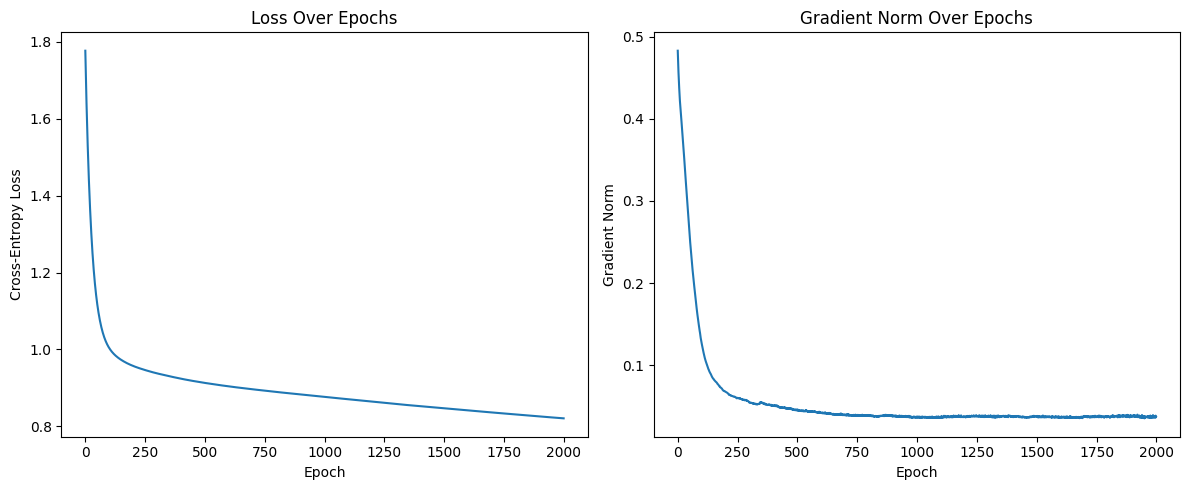

Test accuracy: 0.5750


In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import urllib.request

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
filename = "winequality-red.csv"
urllib.request.urlretrieve(url, filename)

data = pd.read_csv(filename, sep=';')
X = data.drop('quality', axis=1).values
y = data['quality'].values.reshape(-1, 1)

# Classes are: 3, 4, 5, 6, 7, 8 → convert to 0-based indices for classification
unique_classes = np.unique(y)
class_to_index = {val: idx for idx, val in enumerate(unique_classes)}
y_mapped = np.vectorize(class_to_index.get)(y)

scaler =  StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y_mapped.reshape(-1, 1))


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, shuffle=True)

nn = NeuralNetwork(input_size=11, hidden_size=32, output_size=len(unique_classes), learning_rate=0.09)
nn.train(X_train,y_train,epochs = 2000)
nn.plot_metrics()
predictions = nn.predict(X_test)
true_labels = np.argmax(y_test,axis = 1)
predicted_labels = predictions

accuracy  = np.mean(true_labels == predicted_labels)
print(f"Test accuracy: {accuracy:.4f}")



